# 01 – Veri Keşfi ve Dominant Renk Çıkarımı

Bu defterde veri seti üzerinde temel keşif (EDA) yapacak ve her ürün için dominant renkleri çıkaracağız.

In [1]:
# Gerekli kütüphaneler
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data_root = 'data/raw'  # gerekirse güncelle


In [2]:
# Örnek görsel yollarını listeleme (örnek)
image_paths = []
for root, dirs, files in os.walk(data_root):
    for fname in files:
        if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_paths.append(os.path.join(root, fname))

print('Toplam örnek görsel:', len(image_paths))
image_paths[:5]

Toplam örnek görsel: 0


[]

In [3]:
# Örnek bir görseli gösterme
img = Image.open(image_paths[0]).convert('RGB')
plt.imshow(img)
plt.axis('off')

IndexError: list index out of range

In [ ]:
# Dominant renkleri çıkaran yardımcı fonksiyon
def extract_dominant_colors(image, n_colors=5):
    img = image.resize((128, 128))  # hız için küçült
    arr = np.asarray(img).reshape(-1, 3)

    kmeans = KMeans(n_clusters=n_colors, random_state=42)
    kmeans.fit(arr)
    colors = kmeans.cluster_centers_
    return colors  # shape: (n_colors, 3)


In [ ]:
# Basit bir döngü ile subset için renkleri çıkarma (örnek)
records = []
subset_paths = image_paths[:500]  # küçük bir subset

for idx, p in enumerate(subset_paths):
    img = Image.open(p).convert('RGB')
    colors = extract_dominant_colors(img, n_colors=5)
    flat_colors = colors.flatten()  # 5*3 = 15 boyut
    records.append({
        'product_id': idx,
        'image_path': p,
        **{f'c{i}': v for i, v in enumerate(flat_colors)}
    })

df_colors = pd.DataFrame.from_records(records)
df_colors.head()

In [ ]:
# Sonuçları kaydet
os.makedirs('data/processed', exist_ok=True)
df_colors.to_csv('data/processed/colors.csv', index=False)
print('Kaydedildi: data/processed/colors.csv')

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import glob

# data/raw içindeki görselleri okuma
image_paths = glob.glob("data/raw/*")

print("Toplam görsel:", len(image_paths))

# İlk görseli gösterme
img = Image.open(image_paths[0]).convert("RGB")
plt.imshow(img)
plt.axis("off")


In [ ]:
import os

for root, dirs, files in os.walk('.', topdown=True):
    if 'img_00000001.jpg' in files:
        print("Bulundu:", os.path.join(root))



In [ ]:
import os

for root, dirs, files in os.walk('.', topdown=True):
    for f in files:
        if f.endswith('.jpg'):
            print("Bulundu:", os.path.join(root))
            raise SystemExit



In [ ]:
import glob

image_dir = "data/raw"  # DOĞRU KLASÖR
image_paths = glob.glob(f"{image_dir}/*.jpg")

print("Bulunan görsel sayısı:", len(image_paths))
print(image_paths[:5])  # ilk 5 dosyayı göster



In [ ]:
import os
os.getcwd()


In [ ]:
for root, dirs, files in os.walk('data'):
    print(root, len(files))


In [ ]:
import os

data_root = 'data/raw'  # Görselleri yüklediğin klasör

# Tüm jpg, jpeg, png dosyalarını listele
image_paths = [
    os.path.join(data_root, f)
    for f in os.listdir(data_root)
    if f.lower().endswith(('.jpg', '.jpeg', '.png'))
]

len(image_paths), image_paths[:5]


In [ ]:
import os

print("Current working directory:", os.getcwd())
print("Dirs here:", os.listdir())


In [ ]:
data_root = '../data/raw'  # notebooks klasöründen bir üst klasöre çık ve data/raw'a gir

# Tüm jpg, jpeg, png dosyalarını listele
image_paths = [
    os.path.join(data_root, f)
    for f in os.listdir(data_root)
    if f.lower().endswith(('.jpg', '.jpeg', '.png'))
]

len(image_paths), image_paths[:5]


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

for i, img_path in enumerate(image_paths[:6]):  # ilk 6 görseli gösterelim
    img = Image.open(img_path)
    
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(os.path.basename(img_path))
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

results = []  # burada her fotoğraf için sonuçları saklayacağız

for img_path in image_paths:
    img = Image.open(img_path).convert("RGB")
    img_arr = np.array(img)
    
    # Piksel arrayini düzleştir (H*W, 3)
    pixels = img_arr.reshape(-1, 3)

    # KMeans ile 3 ana renk bul
    kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
    kmeans.fit(pixels)

    colors = kmeans.cluster_centers_.astype(int)  # R,G,B değerleri
    
    results.append({
        "image": os.path.basename(img_path),
        "color1": tuple(colors[0]),
        "color2": tuple(colors[1]),
        "color3": tuple(colors[2]),
    })

df = pd.DataFrame(results)
df


In [ ]:
output_path = "../data/processed/colors.csv"
df.to_csv(output_path, index=False)

output_path


In [ ]:
import os

os.makedirs("../data/processed", exist_ok=True)
print("processed klasörü oluşturuldu.")


In [ ]:
output_path = "../data/processed/colors.csv"
df.to_csv(output_path, index=False)

output_path


In [4]:
import os
print(os.listdir("data"))


FileNotFoundError: [WinError 3] Sistem belirtilen yolu bulamıyor: 'data'

In [5]:
import os
print(os.listdir("../data"))


['.ipynb_checkpoints', 'processed', 'raw']


In [6]:
import os

data_root = "../data/raw"

image_paths = [
    os.path.join(data_root, f)
    for f in os.listdir(data_root)
    if f.lower().endswith(('.jpg', '.jpeg', '.png'))
]

print(len(image_paths))
image_paths[:10]


42


['../data/raw\\img_00000001.jpg',
 '../data/raw\\img_000000024.jpg',
 '../data/raw\\img_00000003.jpg',
 '../data/raw\\img_00000004.jpg',
 '../data/raw\\img_000000049.jpg',
 '../data/raw\\img_00000005.jpg',
 '../data/raw\\img_00000007.jpg',
 '../data/raw\\img_000000077.jpg',
 '../data/raw\\img_00000008.jpg',
 '../data/raw\\img_000000088.jpg']

(np.float64(-0.5), np.float64(204.5), np.float64(299.5), np.float64(-0.5))

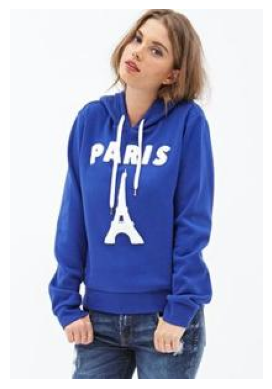

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(image_paths[0]).convert('RGB')
plt.imshow(img)
plt.axis('off')


In [8]:
from sklearn.cluster import KMeans
import numpy as np

def get_dominant_colors(image_path, k=3):
    img = Image.open(image_path).convert('RGB')
    img = img.resize((150, 150))  # işlemi hızlandırır
    img_np = np.array(img).reshape(-1, 3)

    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(img_np)

    colors = kmeans.cluster_centers_.astype(int)
    return [tuple(color) for color in colors]


In [9]:
import pandas as pd

records = []

for path in image_paths:
    dominant = get_dominant_colors(path, k=3)
    records.append({
        "image_path": path,
        "color_1": dominant[0],
        "color_2": dominant[1],
        "color_3": dominant[2],
    })

df = pd.DataFrame(records)

output_path = "../data/processed/colors.csv"
df.to_csv(output_path, index=False)

df.head()


,image_path,color_1,color_2,color_3
0,../data/raw\img_00000001.jpg,"(245, 246, 248)","(53, 69, 136)","(180, 150, 140)"
1,../data/raw\img_000000024.jpg,"(254, 254, 254)","(50, 37, 31)","(182, 155, 141)"
2,../data/raw\img_00000003.jpg,"(252, 252, 252)","(188, 164, 153)","(102, 76, 64)"
3,../data/raw\img_00000004.jpg,"(254, 254, 254)","(57, 74, 96)","(156, 159, 163)"
4,../data/raw\img_000000049.jpg,"(16, 59, 113)","(158, 127, 95)","(198, 203, 218)"


In [10]:
import os
os.listdir("../data/processed")


['colors.csv']